       NO_2
0  0.166799
1  0.175497
2  0.180492
3  0.186456
4  0.165482


C:\Users\Johnny\AppData\Local\Temp/ipykernel_198752/379132895.py:45: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seas_d=sm.tsa.seasonal_decompose(X['NO_2'],model='add',freq=7*24);


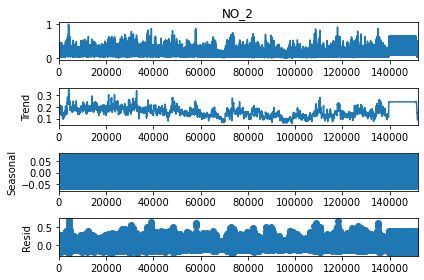

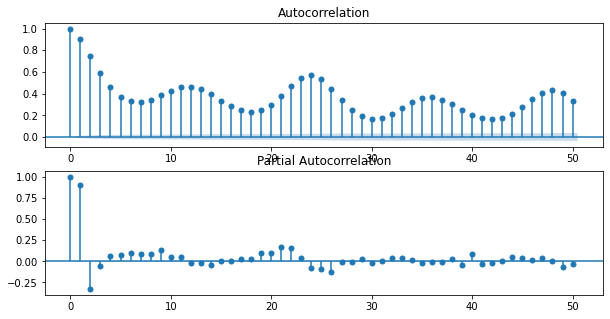

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 24), (0, 0, 1, 24), (0, 1, 0, 24), (0, 1, 1, 24), (1, 0, 0, 24), (1, 0, 1, 24), (1, 1, 0, 24), (1, 1, 1, 24)]
SARIMAX (0, 0, 0) x (0, 0, 0, 24)24 : AIC Calculated =-68923.60160226541
SARIMAX (0, 0, 0) x (0, 0, 1, 24)24 : AIC Calculated =-155788.33819483625
SARIMAX (0, 0, 0) x (0, 1, 0, 24)24 : AIC Calculated =-263230.8192553138


KeyboardInterrupt: 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from math import sqrt
from datetime import datetime,timedelta
from dateutil.rrule import rrule, HOURLY
import statsmodels.api as sm
import itertools

#warnings.filterwarnings("ignore")

frames=[]
for i in {28079024, 28079038, 28079008, 28079040, 28079036, 28079018, 28079011, 28079004, 28079016, 28079039, 28079027}:
    dffinal=pd.read_csv("cleaned-"+str(i)+".csv", index_col='date',parse_dates=True)

    dffinal=dffinal.drop(columns=['NO','CH4','BEN','CO','EBE','MXY','NMHC','NOx','OXY','PXY','SO_2','TCH','TOL','O_3'])

    #print(dffinal.head())
    
    #normalize data
    sc_in = MinMaxScaler(feature_range=(0, 1))
    scaled_input = sc_in.fit_transform(dffinal[['NO_2']])
    scaled_input =pd.DataFrame(scaled_input)
    X=scaled_input
    
    X.rename(columns={0:'NO_2'}, inplace=True)
    print(X.head())

    #split data
    train_size=int(len(X) *0.7)
    test_size = int(len(X)) - train_size
    train_X = X[:train_size].dropna()
    test_X= X[train_size:].dropna()
    
    #plot data trend sesonality and residuals
    seas_d=sm.tsa.seasonal_decompose(X['NO_2'],model='add',freq=7*24);
    fig=seas_d.plot()
    fig.set_figheight(4)
    plt.show()
    
    #corelation
    fig,ax= plt.subplots(2,1, figsize=(10,5))
    fig=sm.tsa.graphics.plot_acf(test_X, lags=50, ax=ax[0])
    fig=sm.tsa.graphics.plot_pacf(test_X, lags=50, ax=ax[1])
    plt.show()
    
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    pdqs = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
    
    print(pdq)
    print(pdqs)
    #determine what the best model would be using a for loop
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(train_X,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
                print('SARIMAX {} x {}24 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except Exception as e:
                print(e)
                continue
                
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    print(ans_df.loc[ans_df['aic'].idxmin()])

In [2]:

sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dffinal[['O_3']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output
y.rename(columns={0:'O_3'}, inplace=True)

print(X.head())
print(y.head())


       NO_2
0  0.145260
1  0.135683
2  0.134430
3  0.118271
4  0.107318
        O_3
0  0.035429
1  0.035429
2  0.034905
3  0.035429
4  0.035571


In [3]:
#split data
train_size=int(len(X) *0.7)
test_size = int(len(X)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

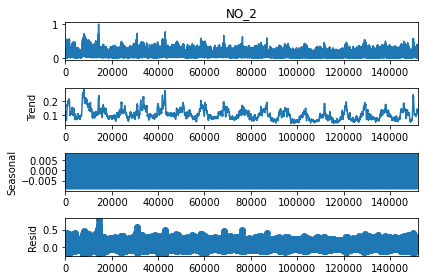

In [4]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X['NO_2'],model='add',freq=7*24);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

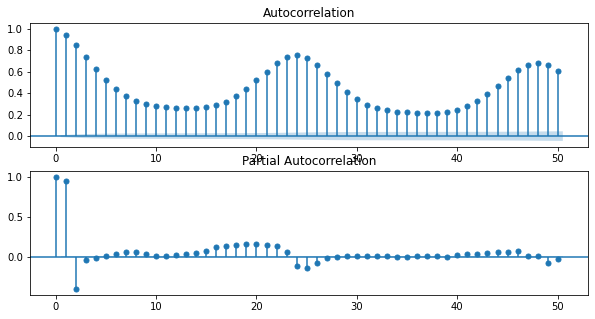

In [5]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(test_y, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(test_y, lags=50, ax=ax[1])
plt.show()

In [6]:
# Define the p, d and q parameters to take any value between 0 and 2
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]


In [7]:
#determine what the best model would be using a for loop
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(X_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}24 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [8]:
import pmdarima
from pmd9arima.arima import auto_arima
step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

ModuleNotFoundError: No module named 'pmdarima'

In [9]:
#print out the best model parameters
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
print(ans_df.loc[ans_df['aic'].idxmin()])

TypeError: reduction operation 'argmin' not allowed for this dtype

In [4]:
#Use pdq and pdqs above to fit the data with the ARIMA model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df_train,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_df_train = ARIMA_MODEL.fit()

print(output_df_train.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8358      0.002    382.985      0.000       0.831       0.840
ma.L1          0.3139      0.003     89.775      0.000       0.307       0.321
ar.S.L24       0.1125      0.004     28.411      0.000       0.105       0.120
ma.S.L24      -0.9606      0.002   -609.804      0.000      -0.964      -0.957
sigma2       140.3147      0.530    264.800      0.000     139.276     141.353


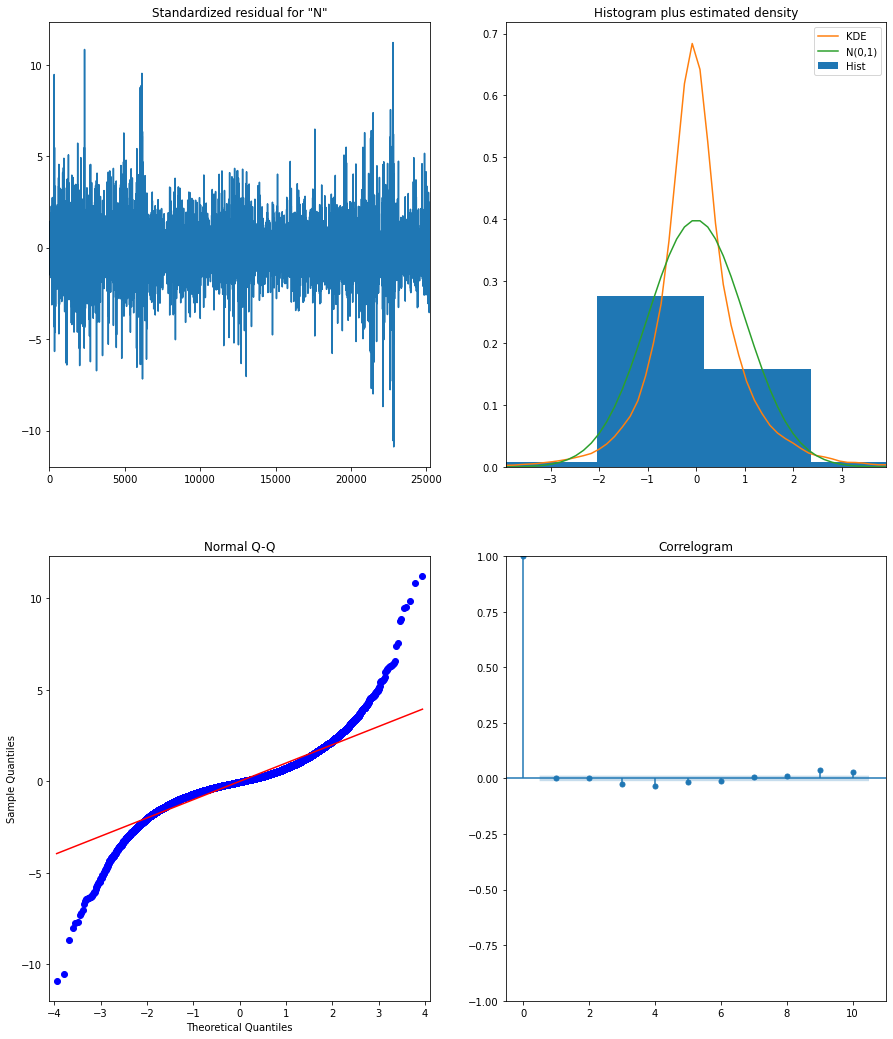

In [5]:
#Use plot_diagnostics with results calculated above to make sure 
#our assumptions of normality and correlation hold
output_df_train.plot_diagnostics(figsize=(15, 18))
plt.show()

In [16]:
#predictions
print(df_test.loc[split_start_test]);
print(df_test.loc[split_end_test]);
predictions= output_df_train.predict(start=split_start_test, end=split_end_test,exog=df_test)

NO_2    59.82
Name: 2005-01-01 01:00:00, dtype: float64
NO_2    14.92
Name: 2006-01-01 00:00:00, dtype: float64


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'